In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
#check for duplicate data
data.duplicated().sum() 

np.int64(0)

In [6]:
#check for null data
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

    Convert uppercase to lowercase
    Remove links
    Remove punctuations
    Remove numbers
    Remove stopwords (and, the, by, is, in, about)
    Stemming (get the base of word)

In [7]:
import re
import string

In [8]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

#### Convert uppercase to lowercase

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

#### Remove links

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word) for word in x.split()))

In [12]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

#### Remove punctuation

In [13]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
data["tweet"] = data["tweet"].apply(remove_punctuation)


In [14]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove numbers

In [15]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)

In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove stopwords

In [ ]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [21]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [23]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

#### Stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [26]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [27]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building vocabulary

In [28]:
from collections import Counter
vocab = Counter()

In [29]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [30]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [31]:
tokens = [key for key in vocab if vocab[key] > 10]

In [32]:
len(tokens)

1145

In [33]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [34]:
x = data['tweet']
y = data['label']

In [35]:
!pip install scikit.learn

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [37]:
x_train.shape

(6336,)

In [38]:
x_test.shape

(1584,)

### Vectorization

In [39]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [40]:
vectorized_x_train = vectorizer(x_train, tokens)

In [41]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [42]:
vectorized_x_test = vectorizer(x_test, tokens)

In [43]:
y_train.value_counts()

label
0    4705
1    1631
Name: count, dtype: int64

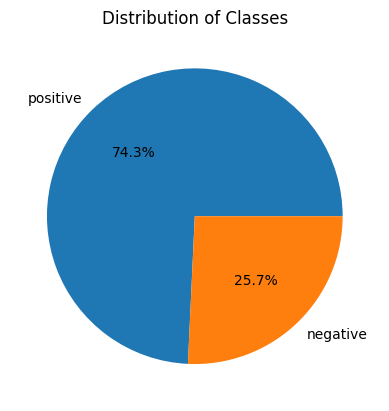

In [44]:
y_train_counts = [y_train.value_counts()[0], y_train.value_counts()[1]]
labels = ['positive', 'negative']

# Creating the pie chart
plt.pie(np.array(y_train_counts), labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Classes")
plt.show()


### Handle inbalanced dataset

In [45]:
!pip install imbalanced-learn

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9410, 1145) (9410,)


In [48]:
y_train_smote.value_counts()

label
0    4705
1    4705
Name: count, dtype: int64

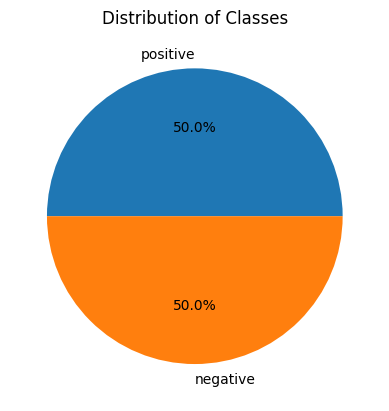

In [65]:
y_train_counts = [y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]
labels = ['positive', 'negative']

# Creating the pie chart
plt.pie(np.array(y_train_counts), labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Classes")
plt.show()


In [66]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9406, 1145), dtype=float32)

In [67]:
y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9401    1
9402    1
9403    1
9404    1
9405    1
Name: label, Length: 9406, dtype: int64

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [69]:
y_test

1275    0
1082    0
1993    0
1727    1
5777    0
       ..
50      0
208     0
2017    0
5380    0
2871    1
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_predict):
    acc = round(accuracy_score(y_act, y_predict), 3)
    pr = round(precision_score(y_act, y_predict), 3)
    rec = round(recall_score(y_act, y_predict), 3)
    f1 = round(f1_score(y_act, y_predict), 3)
    print(f'Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1Score = {f1}')

def validation_scores(y_act, y_predict):
    acc = round(accuracy_score(y_act, y_predict), 3)
    pr = round(precision_score(y_act, y_predict), 3)
    rec = round(recall_score(y_act, y_predict), 3)
    f1 = round(f1_score(y_act, y_predict), 3)
    print(f'Testing scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1Score = {f1}')


#### Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_predict = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_predict)

y_test_predict = lr.predict(vectorized_x_test)
validation_scores(y_test, y_test_predict)

Training scores:
	Accuracy = 0.94
	Precision = 0.915
	Recall = 0.969
	F1Score = 0.941
Testing scores:
	Accuracy = 0.877
	Precision = 0.713
	Recall = 0.848
	F1Score = 0.775


#### Multinomial Naive Bayes

In [65]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_predict = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_predict)

y_test_predict = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_predict)

Training scores:
	Accuracy = 0.908
	Precision = 0.871
	Recall = 0.959
	F1Score = 0.913
Testing scores:
	Accuracy = 0.863
	Precision = 0.664
	Recall = 0.914
	F1Score = 0.769


#### Decision Tree

In [66]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_predict = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_predict)

y_test_predict = dt.predict(vectorized_x_test)
validation_scores(y_test, y_test_predict)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1Score = 1.0
Testing scores:
	Accuracy = 0.828
	Precision = 0.667
	Recall = 0.623
	F1Score = 0.644


#### Random Forest

In [67]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_predict = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_predict)

y_test_predict = rf.predict(vectorized_x_test)
validation_scores(y_test, y_test_predict)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1Score = 1.0
Testing scores:
	Accuracy = 0.869
	Precision = 0.745
	Recall = 0.724
	F1Score = 0.734


#### Support Vector Machine

In [68]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_predict = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_predict)

y_test_predict = svm.predict(vectorized_x_test)
validation_scores(y_test, y_test_predict)

Training scores:
	Accuracy = 0.977
	Precision = 0.959
	Recall = 0.996
	F1Score = 0.977
Testing scores:
	Accuracy = 0.882
	Precision = 0.737
	Recall = 0.818
	F1Score = 0.776


In [70]:
import pickle
with open('../static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)